In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

## 定义多层感知器模型

1. 神经元激活函数ReLU
2. 网络结构1000，100，10

In [2]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1000, 100) 
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x

### 声明一个多层感知器的实例

In [3]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=1000, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


### 模型参数

In [4]:
params = list(net.parameters())
print(len(params))
print(params[0].size())
print(params[1].size())
print(params[2].size())
print(params[3].size())

4
torch.Size([100, 1000])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


### 试运行模型

In [5]:
x = torch.randn(1000)
y = net(x)
y

tensor([0.0154, 0.0000, 0.0000, 0.0000, 0.0726, 0.0000, 0.0000, 0.0000, 0.0000,
        0.2379], grad_fn=<ReluBackward0>)

## 参数学习

### 选择优化器

加载优化模块

In [46]:
import torch.optim as optim

设置随机梯度下降算法，学习率设为0.01

In [47]:
optimizer = optim.SGD(net.parameters(), lr=0.01)

### 设置损失函数

In [48]:
criterion = nn.MSELoss()

### BP训练

设置训练数据

In [49]:
X = torch.randn(64, 1000)
y = torch.rand(64, 10)

BP迭代更新

In [50]:
losses = []

In [51]:
for epoch in range(100):
    optimizer.zero_grad()      # zero the gradient buffers
    yhat = net(X)              # forward calculation
    loss = criterion(yhat, y)  # loss value
    losses.append(loss.item())
    loss.backward()            # backward calculation
    optimizer.step()           # update parameters
    

显式表示参数更新过程:

learning_rate = 0.01

for f in net.parameters():

    f.data.sub_(f.grad.data * learning_rate)

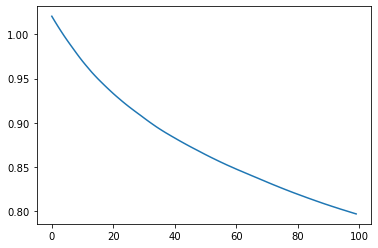

In [54]:
import matplotlib.pyplot as plt
plt.plot(losses)